In [2]:
#import relevant modules
import pandas as pd
import numpy as np
import pandas_datareader as data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#create a small function that we can feed a list of stock tickers to to download pricing data
def get_prices(tickers,start):
    prices = data.DataReader(tickers,'yahoo',start=start)['Adj Close']
    return prices

In [4]:
#set the url that we will scrape the Dow 30 ticker information from 
dow = 'https://www.cnbc.com/dow-components/'
 
#read in the url and scrape ticker data
data_table = pd.read_html(dow)
 
#convert ticker column to list
tickers = data_table[:][0]['Symbol'].tolist()
 


In [5]:
#download daily pricing data for each ticker in the Dow 30
prices = get_prices(tickers,'01/01/2017')
 
#Calculate percentage return over download period
returns = (((prices.iloc[-1] / prices.iloc[0]) - 1) * 100).round(2)

In [7]:
#create a reshaped array of ticker symbols that matches the desired shape of the heatmap
symbol = ((np.asarray(returns.index)).reshape(6,5))
 
#create a reshaped array of percent returns that matches the desired shape of the heatmap
per_change = ((np.asarray(returns)).reshape(6,5))
 
 
#create a new array of the same shape as desired, combining the relevant ticker symbol
#and percentage return data
labels = (np.asarray(["{0} \n {1:.3f}".format(symbol, per_change)
                      for symbol, per_change in zip(symbol.flatten(),
                                               per_change.flatten())])).reshape(6,5)

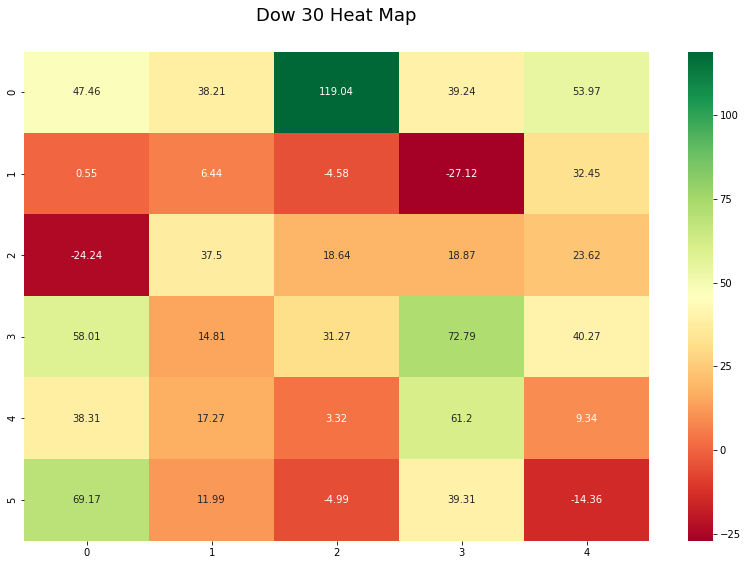

In [8]:
fig, ax = plt.subplots(figsize=(14,9))
plt.title('Dow 30 Heat Map',fontsize=18)
ax.title.set_position([0.5,1.05])
ax.set_xticks([])
sns.heatmap(per_change, annot=True, fmt="", cmap='RdYlGn', ax=ax)
plt.show()